### https://www.kaggle.com/c/bike-sharing-demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, MinMaxScaler, StandardScaler

In [2]:
test = pd.read_csv(filepath_or_buffer='test.csv')
train = pd.read_csv(filepath_or_buffer='train.csv')
all_df = pd.concat((train, test), axis=0).reset_index()

In [3]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
index         17379 non-null int64
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null object
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.7+ MB


In [5]:
all_df.describe()

,index,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
count,17379.000000,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,4621.861615,23.788755,36.021955,191.574132,0.028770,62.722884,155.552177,2.501640,20.376474,1.425283,12.736540,0.682721
std,2937.348887,8.592511,49.960477,181.144454,0.167165,19.292983,151.039033,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,2172.000000,16.665000,4.000000,42.000000,0.000000,48.000000,36.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,4344.000000,24.240000,17.000000,145.000000,0.000000,63.000000,118.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,6540.500000,31.060000,49.000000,284.000000,0.000000,78.000000,222.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,10885.000000,50.000000,367.000000,977.000000,1.000000,100.000000,886.000000,4.000000,41.000000,4.000000,56.996900,1.000000


In [6]:
all_df[['atemp', 'temp']].sort_values(by='atemp', ascending=False).head()

,atemp,temp
12508,50.000,39.36
12509,49.240,38.54
12507,49.240,38.54
12506,47.725,38.54
12504,46.210,36.90


In [7]:
all_df['hour'] = all_df.datetime.apply(lambda x: int(x.split()[1].split(":")[0]))

In [8]:
season_binary = LabelBinarizer().fit_transform(all_df.season)

In [9]:
season_binary

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [10]:
season_dummy = pd.get_dummies(all_df.season, prefix='season')

In [11]:
season_dummy.head()

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [12]:
all_df.head()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,hour
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,3
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,4


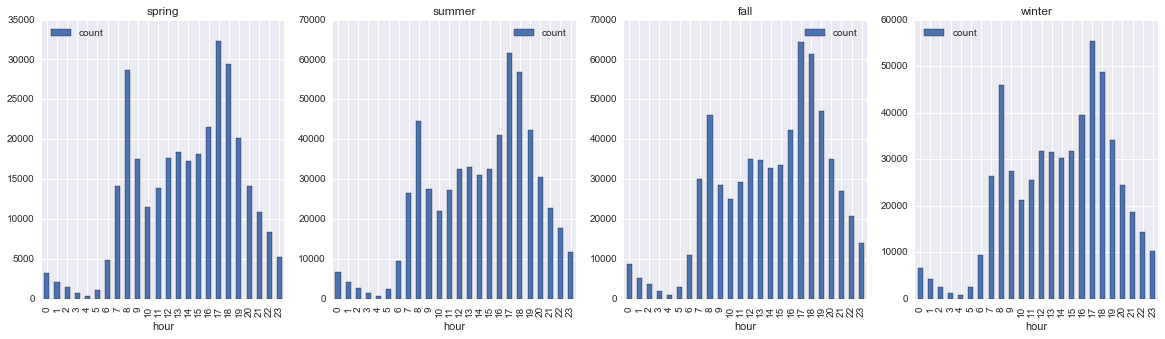

In [13]:
tmp_train = all_df[:train.shape[0]]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
tmp_train[tmp_train.season == 1][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='spring', ax=axes[0])
tmp_train[tmp_train.season == 2][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='summer', ax=axes[1])
tmp_train[tmp_train.season == 3][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='fall', ax=axes[2])
tmp_train[tmp_train.season == 4][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='winter', ax=axes[3])

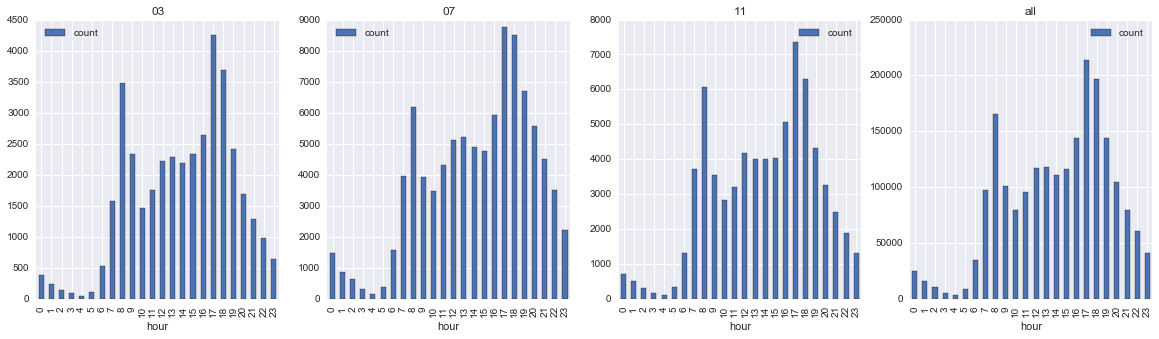

In [14]:
tmp_train = all_df[:train.shape[0]]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
tmp_train[tmp_train.datetime.str.contains('2011-03')][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='03', ax=axes[0])
tmp_train[tmp_train.datetime.str.contains('2011-07')][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='07', ax=axes[1])
tmp_train[tmp_train.datetime.str.contains('2011-11')][['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='11', ax=axes[2])
tmp_train[['hour', 'count']].groupby('hour').agg(sum).plot(kind='bar', title='all', ax=axes[3])

In [15]:
atemp_scaler = MinMaxScaler().fit_transform(StandardScaler().fit_transform(all_df.atemp.reshape(-1, 1))).flatten()
humidity_scaler = MinMaxScaler().fit_transform(StandardScaler().fit_transform(all_df.humidity.reshape(-1, 1))).flatten()

c:\program files\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
c:\program files\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
c:\program files\python35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
all_df['atemp_scale'] = atemp_scaler
all_df['humidity_scale'] = humidity_scaler

In [17]:
train_mod = all_df[:train.shape[0]][['hour', 'atemp_scale', 'season', 'humidity_scale', 'workingday', 'holiday', 'count']]
train_mod.head()

,hour,atemp_scale,season,humidity_scale,workingday,holiday,count
0,0,0.2879,1,0.81,0,0,16.0
1,1,0.2727,1,0.80,0,0,40.0
2,2,0.2727,1,0.80,0,0,32.0
3,3,0.2879,1,0.75,0,0,13.0
4,4,0.2879,1,0.75,0,0,1.0


In [18]:
train_mod.corr()

,hour,atemp_scale,season,humidity_scale,workingday,holiday,count
hour,1.000000,0.140343,-0.006546,-0.278011,0.002780,-0.000354,0.400601
atemp_scale,0.140343,1.000000,0.264744,-0.043536,0.024660,-0.005215,0.389784
season,-0.006546,0.264744,1.000000,0.190610,-0.008126,0.029368,0.163439
humidity_scale,-0.278011,-0.043536,0.190610,1.000000,-0.010880,0.001929,-0.317371
workingday,0.002780,0.024660,-0.008126,-0.010880,1.000000,-0.250491,0.011594
holiday,-0.000354,-0.005215,0.029368,0.001929,-0.250491,1.000000,-0.005393
count,0.400601,0.389784,0.163439,-0.317371,0.011594,-0.005393,1.000000


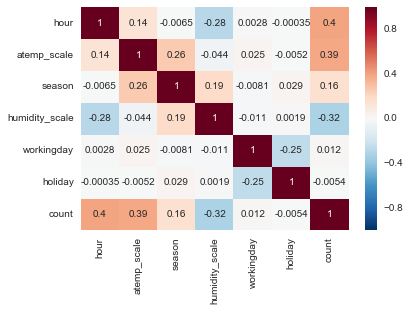

In [19]:
sns.heatmap(train_mod.corr(), annot=True)

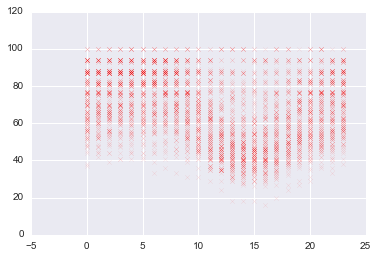

In [89]:
plt.scatter(all_df[all_df.season == 4].hour.values, all_df[all_df.season == 4].humidity.values, marker='x', alpha=0.15, c='r') 

### prepare train data

In [37]:
all_mod = all_df[['hour', 'atemp_scale', 'season', 'humidity_scale', 'workingday']]
all_mod = all_mod.join(pd.get_dummies(all_df.season, prefix='season'), how='inner')
all_mod = all_mod.join(pd.get_dummies(all_df.hour, prefix='hour'), how='inner')
all_mod.head()

,hour,atemp_scale,season,humidity_scale,workingday,season_1,season_2,season_3,season_4,hour_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0.2879,1,0.81,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.2727,1,0.80,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.2727,1,0.80,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.2879,1,0.75,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.2879,1,0.75,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train = all_mod[:train.shape[0]].values
X_test = all_mod[train.shape[0]:].values

In [39]:
Y_train = train_mod['count']
Y_train.head()

0    16.0
1    40.0
2    32.0
3    13.0
4     1.0
Name: count, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [41]:
model = RandomForestClassifier()

In [42]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
model.score(X_train, Y_train)

0.8549513136138159

In [169]:
result = pd.DataFrame({
    'datetime' : test['datetime'],
    'count' : model.predict(X_test)
})

In [170]:
result[['datetime', 'count']].to_csv('rf_submission.csv', index=False)

In [32]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))